<a href="https://colab.research.google.com/github/sajal-code/Sentiment_Analysis_for_Software_Engineering/blob/main/Statistical_Sentiment_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import nltk
import sklearn
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize, sent_tokenize
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_validate

## Import Dataset

In [3]:
from google.colab import drive 
import os
drive.mount('/content/drive') 
os.chdir('/content/drive/My Drive/Thesis Dataset/CSV File') # EXAMPLE: /content/drive/My Drive/Sentiment_analysis_using_BERT 
df = pd.read_csv("Jira.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Comment,Sentiment
0,Committed. Thanks Ning,Positive
1,Sorry I meant ZOOKEEPER-1239.,Negative
2,Hi Ted Matteo Thanks for the review. The co...,Positive
3,Thanks to both of you and to Deepesh for the ...,Positive
4,I just committed this. thanks steven!,Positive


## Descibe Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


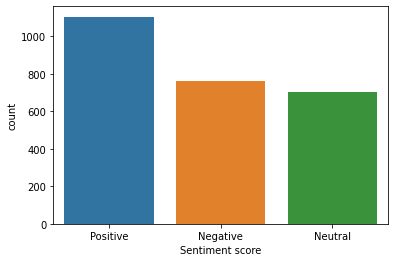

In [4]:
sns.countplot(df.Sentiment)
plt.xlabel('Sentiment score');

## Cleaning Dataset

In [5]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    #remove whitespace
    text=text.strip()
    return text

df['Cleaned_Comment']=[scrub_words(w) for w in df.Comment]

## Removing Stop Words

In [6]:
# Removing stop words (Stop words are a set of commonly used words in any language)
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words

nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Test Train Split

In [8]:
X = df.Cleaned_Comment
y = df.Sentiment

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

## Defining Lemmatization Function

In [9]:
# Defining lemmatizing function

def lemma_func(text):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in Cleaned_Comment.split()]) for Cleaned_Comment in text]

In [10]:
# Corpus: 

corpus = X_train.values.tolist()

## Vectorization Function

In [11]:
vectorizer = TfidfVectorizer(input='content',
                              analyzer='word',
                              token_pattern='(?u)\\\\b\\\\w\\\\w+\\\\b',   #removing non-alphabets
                              tokenizer=lemma_func,    #lemmatisation of words
                              ngram_range=(1,2),   #unigrams and bigrams considered only
                              min_df=100,  #tokens occuring in <500 documents neglected
                              max_df = 0.95,  #tokens occuring in >95% documents neglected
                              max_features=50000,
                              stop_words=stop_words, #stopwords removed
                              lowercase=True  #converting all tokens to lowercase
                              )

In [12]:
data_train = vectorizer.fit_transform((corpus))

tar_lab = y_train

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


## Building the Logistic Regression Model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.6s finished


Accuracy: 0.77431906614786
F1 score: 0.776199706528777
Recall: 0.77431906614786
Precision: 0.7815236052857648
              precision    recall  f1-score   support

     Class 0       0.76      0.70      0.73       166
     Class 1       0.66      0.77      0.71       137
     Class 2       0.88      0.83      0.86       211

    accuracy                           0.77       514
   macro avg       0.77      0.77      0.76       514
weighted avg       0.78      0.77      0.78       514



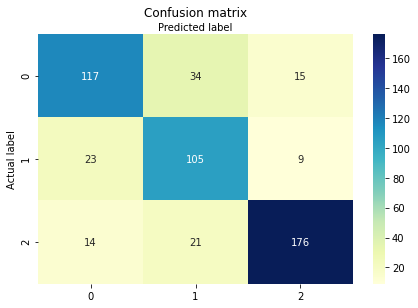

In [13]:
lr = LogisticRegressionCV(random_state=0, solver='liblinear', multi_class='ovr', cv=10, verbose=1)
lr_model = lr.fit(data_train, tar_lab)

test_corpus = X_test.values.tolist()
test = vectorizer.transform(test_corpus)

y_pred=lr_model.predict(test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))

from sklearn.metrics import classification_report
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

## Building the SVM Model

Accuracy: 0.7898832684824902
F1 score: 0.7937948715388227
Recall: 0.7898832684824902
Precision: 0.8055272538697787
              precision    recall  f1-score   support

     Class 0       0.77      0.74      0.76       166
     Class 1       0.65      0.81      0.72       137
     Class 2       0.93      0.82      0.87       211

    accuracy                           0.79       514
   macro avg       0.79      0.79      0.78       514
weighted avg       0.81      0.79      0.79       514



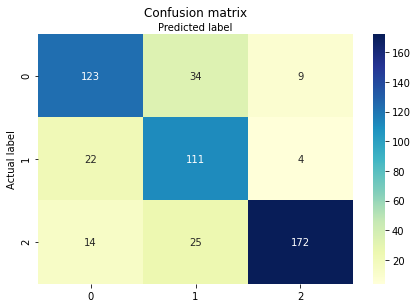

In [15]:
svm_new = SVC()
svm_model = svm_new.fit(data_train, tar_lab)

test_corpus = X_test.values.tolist()
test = vectorizer.transform(test_corpus)

y_pred=svm_model.predict(test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))

from sklearn.metrics import classification_report
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

## Building Naive Bayes Model

Accuracy: 0.708171206225681
F1 score: 0.7062324558206582
Recall: 0.708171206225681
Precision: 0.708016762442142
              precision    recall  f1-score   support

     Class 0       0.64      0.72      0.68       166
     Class 1       0.64      0.54      0.58       137
     Class 2       0.81      0.81      0.81       211

    accuracy                           0.71       514
   macro avg       0.70      0.69      0.69       514
weighted avg       0.71      0.71      0.71       514



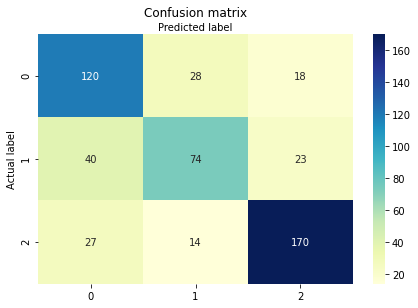

In [16]:
nb = MultinomialNB()
nb_model = nb.fit(data_train, tar_lab)

test_corpus = X_test.values.tolist()
test = vectorizer.transform(test_corpus)

y_pred=nb_model.predict(test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print ('F1 score:', metrics.f1_score(y_test, y_pred,average='weighted'))
print ('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))
print ('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))

from sklearn.metrics import classification_report
target_names = ['Class 0', 'Class 1', 'Class 2']
print(classification_report(y_test, y_pred, target_names=target_names))